<a href="https://colab.research.google.com/github/linhlk123/HR-Attrition-Prediction/blob/colab-work/HR_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HR_Attrition_Indian_Dataset.csv to HR_Attrition_Indian_Dataset.csv


###**Employee Attrition Prediction**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('HR_Attrition_Indian_Dataset.csv')
data.head()

,EmployeeID,FullName,Age,Gender,Department,Designation,EducationQualification,MonthlySalary,DateOfJoining,YearsWithCompany,...,TrainingHours,DoesOvertime,JobSatisfaction,WorkLifeBalance,MaritalStatus,PreviousCompanies,DistanceFromHome,LeavesTaken,City,LeftCompany
0,EMP20230001,Sahil Tailor,48,Other,HR,Accounts Officer,B.Tech,111813,2020-05-26,5,...,37,Yes,4,3,Single,0,12.2,4,Mumbai,No
1,EMP20230002,Parinaaz Choudhary,26,Female,IT,Accounts Officer,B.Tech,87425,2020-10-02,5,...,39,No,2,2,Divorced,0,36.7,29,Kolkata,No
2,EMP20230003,Anahi Babu,40,Male,IT,Software Engineer,Diploma,86461,2021-05-01,4,...,32,No,2,3,Married,1,45.4,0,Bengaluru,Yes
3,EMP20230004,Dhruv Dass,54,Other,HR,Accounts Officer,Diploma,23720,2023-04-01,2,...,21,Yes,4,4,Married,0,29.9,27,Kolkata,No
4,EMP20230005,Seher Bal,51,Other,Admin,Sales Associate,B.Tech,39041,2018-12-19,7,...,30,No,2,2,Single,0,26.8,6,Delhi,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmployeeID              5000 non-null   object 
 1   FullName                5000 non-null   object 
 2   Age                     5000 non-null   int64  
 3   Gender                  5000 non-null   object 
 4   Department              5000 non-null   object 
 5   Designation             5000 non-null   object 
 6   EducationQualification  5000 non-null   object 
 7   MonthlySalary           5000 non-null   int64  
 8   DateOfJoining           5000 non-null   object 
 9   YearsWithCompany        5000 non-null   int64  
 10  YearsInRole             5000 non-null   int64  
 11  AppraisalRating         5000 non-null   int64  
 12  TrainingHours           5000 non-null   int64  
 13  DoesOvertime            5000 non-null   object 
 14  JobSatisfaction         5000 non-null   

In [ ]:
data.isna().sum()

,0
EmployeeID,0
FullName,0
Age,0
Gender,0
Department,0
Designation,0
EducationQualification,0
MonthlySalary,0
DateOfJoining,0
YearsWithCompany,0


↪ Cơ bản là data đã sạch nên không cần clean nữa.

###**Random Forest Classification**

Chạy lại từ đầu cho dễ

**KHAI BÁO VÀ THƯ VIỆN**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HR_Attrition_Indian_Dataset.csv to HR_Attrition_Indian_Dataset (1).csv


**PREPROCESSING DATA**

In [ ]:
data = pd.read_csv('HR_Attrition_Indian_Dataset.csv')
# 2. Chuyển đổi biến mục tiêu 'LeftCompany' sang dạng số (1/0) để tính tương quan
# 'Yes' -> 1, 'No' -> 0
data['LeftCompany_Numeric'] = data['LeftCompany'].map({'Yes': 1, 'No': 0})
#Drop LeftCompany, EmployeeID
data = data.drop('LeftCompany', axis=1)
data = data.drop('FullName', axis=1)
data = data.drop('City', axis=1)
data = data.drop('DateOfJoining', axis=1)
data = data.drop('EmployeeID', axis=1)
#Binary Encoding: DoesOvertime
data['DoesOvertime'] = data['DoesOvertime'].map({'Yes': 1, 'No': 0})

#OneHot Encoding
data = data.join(pd.get_dummies(data['Department'], prefix='Department')).drop('Department', axis=1)
data = data.join(pd.get_dummies(data['Gender'])).drop('Gender', axis=1)
data = data.join(pd.get_dummies(data['Designation'], prefix='Designation')).drop('Designation', axis=1)
data = data.join(pd.get_dummies(data['EducationQualification'], prefix='EducationQualification')).drop('EducationQualification', axis=1)
data = data.join(pd.get_dummies(data['MaritalStatus'], prefix='MaritalStatus')).drop('MaritalStatus', axis=1)
data = data.map(lambda x: 1 if x is True else 0 if x is False else x)

**CHIA TRAIN/TEST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X,y = data.drop('LeftCompany_Numeric', axis=1), data['LeftCompany_Numeric']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=10)

model = RandomForestClassifier(n_jobs=-1)


In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Định nghĩa "lưới" các tham số muốn thử
param_grid = {
    'n_estimators': [100, 200],      # Số lượng cây
    'max_depth': [5, 10, None],          # Độ sâu tối đa của cây (None là để tự do)
    'min_samples_split': [2, 5],      # Số mẫu tối thiểu để tách nhánh
    'min_samples_leaf': [3, 4],     # Số mẫu tối thiểu ở lá
    'max_features': [None]
}

In [ ]:
# 2. Thiết lập tìm kiếm (Grid Search)
# cv=3: Chạy kiểm chứng chéo 3 lần cho chắc ăn
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# 3. Bắt đầu "huấn luyện" (Có thể mất 1-2 phút)
print("Đang tìm tham số tối ưu... Đợi chút nhé...")
grid_search.fit(X_train, y_train) # Dùng dữ liệu top 15 features

Đang tìm tham số tối ưu... Đợi chút nhé...
Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None], 'max_features': [None],
                         'min_samples_leaf': [3, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [ ]:
# 2. Lấy model tốt nhất
best_rf = grid_search.best_estimator_

print("Best params:", grid_search.best_params_)

# 3. Predict với threshold bình thường
y_pred = best_rf.predict(X_test)
print("\n--- REPORT THRESHOLD 0.5 (MẶC ĐỊNH) ---")
print(classification_report(y_test, y_pred))

# 4. --- ÁP DỤNG THRESHOLD MỚI ---
y_proba = best_rf.predict_proba(X_test)[:, 1]

threshold = 0.4  # 🟢 GIẢM TẠI ĐÂY
y_pred_threshold = (y_proba >= threshold).astype(int)

print("\n--- REPORT THRESHOLD 0.4 (ĐÃ GIẢM) ---")
print(classification_report(y_test, y_pred_threshold))

Best params: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

--- REPORT THRESHOLD 0.5 (MẶC ĐỊNH) ---
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       627
           1       0.79      0.60      0.68       373

    accuracy                           0.79      1000
   macro avg       0.79      0.75      0.76      1000
weighted avg       0.79      0.79      0.78      1000


--- REPORT THRESHOLD 0.4 (ĐÃ GIẢM) ---
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       627
           1       0.79      0.62      0.70       373

    accuracy                           0.80      1000
   macro avg       0.80      0.76      0.77      1000
weighted avg       0.80      0.80      0.79      1000



In [ ]:
# --- 3. DỰ ĐOÁN & ĐÁNH GIÁ ---
y_pred = model.predict(X_test)

**ĐÁNH GIÁ & KẾT QUẢ**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("--- Báo cáo chi tiết ---")
print(classification_report(y_test, y_pred))

--- Báo cáo chi tiết ---
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       627
           1       0.79      0.61      0.69       373

    accuracy                           0.80      1000
   macro avg       0.79      0.76      0.77      1000
weighted avg       0.79      0.80      0.79      1000



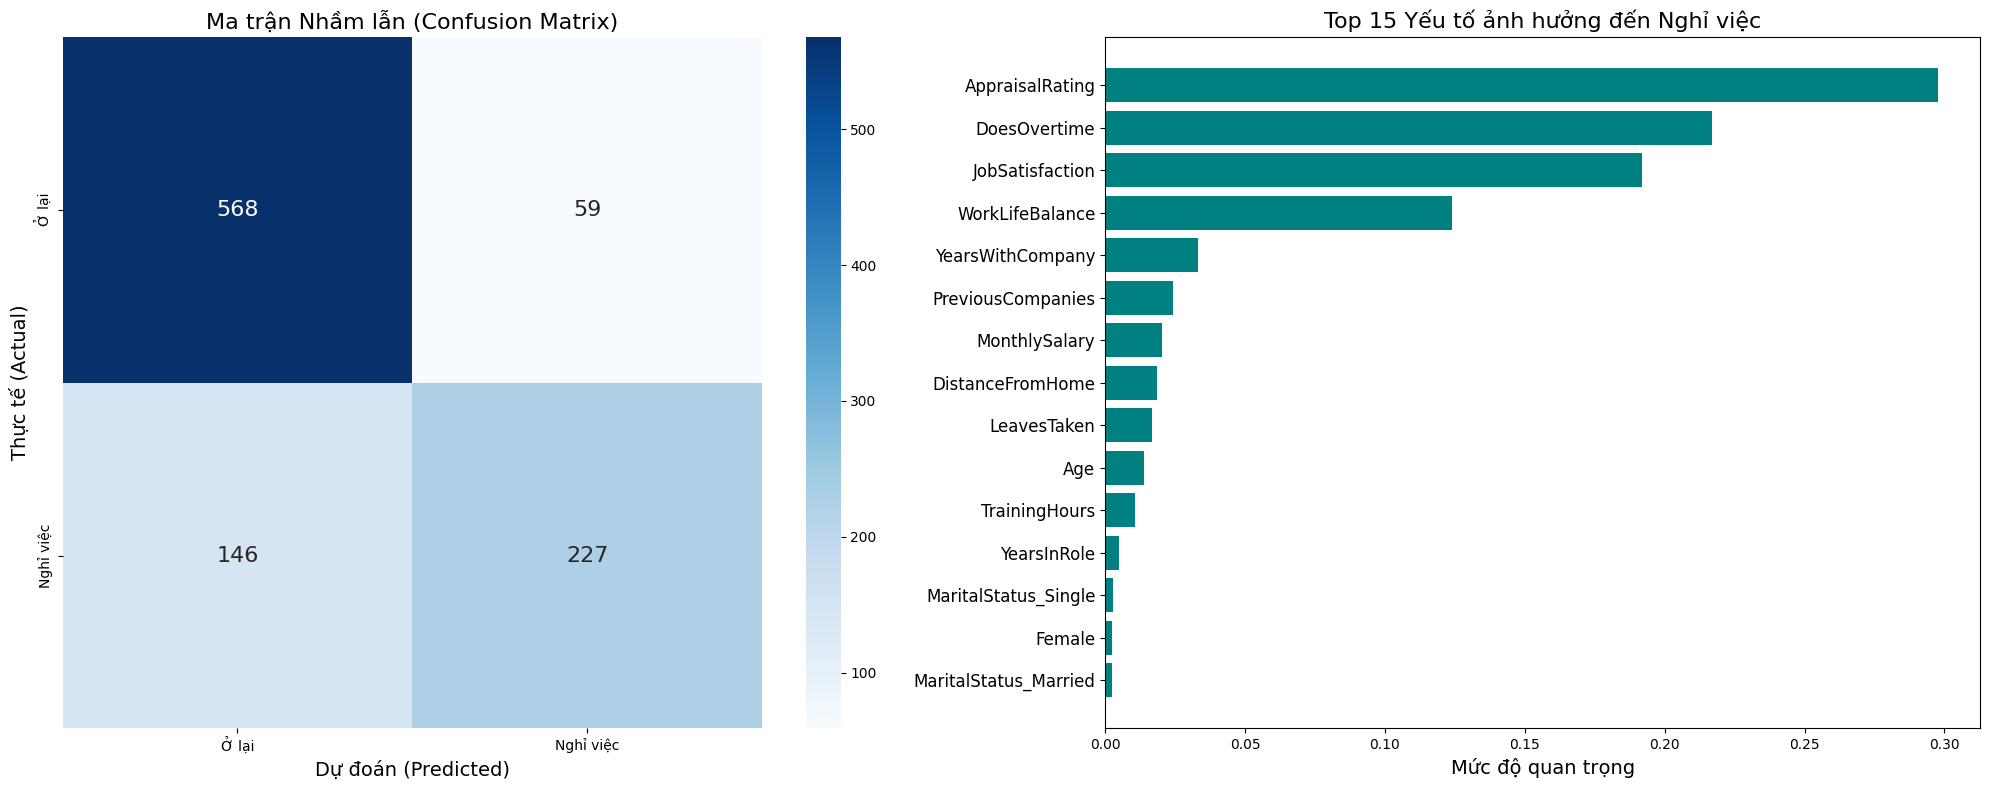

In [ ]:
# --- 4. TRỰC QUAN HÓA (VẼ BIỂU ĐỒ) ---
# Tạo khung hình lớn chứa 2 biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# BIỂU ĐỒ 1: Confusion Matrix (Xem bắt trúng bao nhiêu)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], annot_kws={"size": 16})
axes[0].set_title('Ma trận Nhầm lẫn (Confusion Matrix)', fontsize=16)
axes[0].set_xlabel('Dự đoán (Predicted)', fontsize=14)
axes[0].set_ylabel('Thực tế (Actual)', fontsize=14)
axes[0].set_xticklabels(['Ở lại', 'Nghỉ việc'])
axes[0].set_yticklabels(['Ở lại', 'Nghỉ việc'])

# BIỂU ĐỒ 2: Feature Importance (Yếu tố nào quan trọng nhất)
importances = model.feature_importances_
# Sắp xếp từ cao xuống thấp
indices = np.argsort(importances)[::-1]
# Lấy Top 15 yếu tố
top_n = 15
axes[1].barh(range(top_n), importances[indices[:top_n]], align='center', color='teal')
axes[1].set_yticks(range(top_n))
axes[1].set_yticklabels(X.columns[indices[:top_n]], fontsize=12)
axes[1].invert_yaxis() # Đảo ngược để cái quan trọng nhất lên đầu
axes[1].set_title('Top 15 Yếu tố ảnh hưởng đến Nghỉ việc', fontsize=16)
axes[1].set_xlabel('Mức độ quan trọng', fontsize=14)

plt.tight_layout()
plt.show()

**Nhận xét**

*   Kết quả từ ma trận nhầm lẫn cho thấy mô hình dự đoán đúng 568 nhân viên ở lại và chỉ dự đoán nhầm 59 người thuộc nhóm này là có xu hướng nghỉ việc. Điều này cho thấy mô hình rất chính xác đối với nhóm “ở lại”, với tỷ lệ dự đoán sai thấp.
*   Tuy nhiên, với nhóm nhân viên nghỉ việc, mô hình vẫn bỏ sót khá nhiều trường hợp, thể hiện qua 161 trường hợp mà mô hình dự đoán sai là “ở lại”. Đây là hạn chế quan trọng, vì việc nhận diện đúng nhân viên có khả năng nghỉ việc là mục tiêu chính của bài toán. Mặc dù vậy, mô hình cũng đã dự đoán đúng 212 trường hợp nghỉ việc, một con số tương đối tốt đối với bài toán thường gặp mất cân bằng dữ liệu



In [ ]:
dict(sorted(zip(model.feature_names_in_, model.feature_importances_), key=lambda x: x[1], reverse=True))

{'JobSatisfaction': np.float64(0.09564563898648104),
 'AppraisalRating': np.float64(0.09096702197908424),
 'MonthlySalary': np.float64(0.07710397788809423),
 'DistanceFromHome': np.float64(0.07556043841025674),
 'TrainingHours': np.float64(0.06945717670974189),
 'WorkLifeBalance': np.float64(0.06656983122090324),
 'Age': np.float64(0.06576098461029314),
 'LeavesTaken': np.float64(0.06573338312949066),
 'YearsWithCompany': np.float64(0.052730693599647764),
 'YearsInRole': np.float64(0.043285247510435734),
 'DoesOvertime': np.float64(0.0403043656458849),
 'PreviousCompanies': np.float64(0.039264810889824676),
 'Female': np.float64(0.011693066499274402),
 'Other': np.float64(0.011671891014828378),
 'MaritalStatus_Married': np.float64(0.011533092070451624),
 'Department_Sales': np.float64(0.011163670177137647),
 'Designation_Accounts Officer': np.float64(0.010722012417919084),
 'Designation_Software Engineer': np.float64(0.010718425862705168),
 'MaritalStatus_Divorced': np.float64(0.010626

In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Định nghĩa "lưới" các tham số muốn thử
# Random Forest có rất nhiều nút vặn, ta thử vặn vài cái chính
param_grid = {
    'n_estimators': [100, 200, 300],      # Số lượng cây
    'max_depth': [10, 20, None],          # Độ sâu tối đa của cây (None là để tự do)
    'min_samples_split': [2, 5, 10],      # Số mẫu tối thiểu để tách nhánh
    'min_samples_leaf': [1, 2, 4]         # Số mẫu tối thiểu ở lá
}

# 2. Thiết lập tìm kiếm (Grid Search)
# cv=3: Chạy kiểm chứng chéo 3 lần cho chắc ăn
grid_search = GridSearchCV(estimator=rf_new, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# 3. Bắt đầu "huấn luyện" (Có thể mất 1-2 phút)
print("Đang tìm tham số tối ưu... Đợi chút nhé...")
grid_search.fit(X_train_new, y_train_resampled) # Dùng dữ liệu top 15 features

# 4. Xem kết quả
print("\n--- KẾT QUẢ TỐT NHẤT ---")
print("Tham số xịn nhất:", grid_search.best_params_)
print("Điểm Accuracy cao nhất tìm được:", grid_search.best_score_)

# 5. Lấy mô hình tốt nhất ra để test
best_rf = grid_search.best_estimator_
y_pred_optimized = best_rf.predict(X_test_new)

print("\n--- ĐÁNH GIÁ TRÊN TẬP TEST THỰC TẾ ---")
print(classification_report(y_test_raw, y_pred_optimized))

Đang tìm tham số tối ưu... Đợi chút nhé...
Fitting 3 folds for each of 81 candidates, totalling 243 fits

--- KẾT QUẢ TỐT NHẤT ---
Tham số xịn nhất: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Điểm Accuracy cao nhất tìm được: 0.8835507102685637

--- ĐÁNH GIÁ TRÊN TẬP TEST THỰC TẾ ---
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       629
           1       0.79      0.57      0.66       371

    accuracy                           0.78      1000
   macro avg       0.79      0.74      0.75      1000
weighted avg       0.78      0.78      0.77      1000



###**Logistic Regression**

Vì dữ liệu mất cân bằng (trong Confusion Matrix) nên nhóm sẽ thực hiện Resampling, cụ thể là Oversampling.

*   Mục tiêu: Giúp Logistic Regression học tốt hơn và không bias về class 0



Đang phân tích các yếu tố: ['JobSatisfaction', 'AppraisalRating', 'WorkLifeBalance', 'YearsInRole', 'YearsWithCompany', 'DoesOvertime']

--- HIỆU QUẢ CỦA BỘ 6 FEATURES NÀY ---
              precision    recall  f1-score   support

           0       0.77      0.61      0.68       629
           1       0.51      0.68      0.58       371

    accuracy                           0.64      1000
   macro avg       0.64      0.65      0.63      1000
weighted avg       0.67      0.64      0.64      1000



/tmp/ipython-input-2001730927.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Odds_Ratio', y='Feature', data=df_odds, palette=colors)


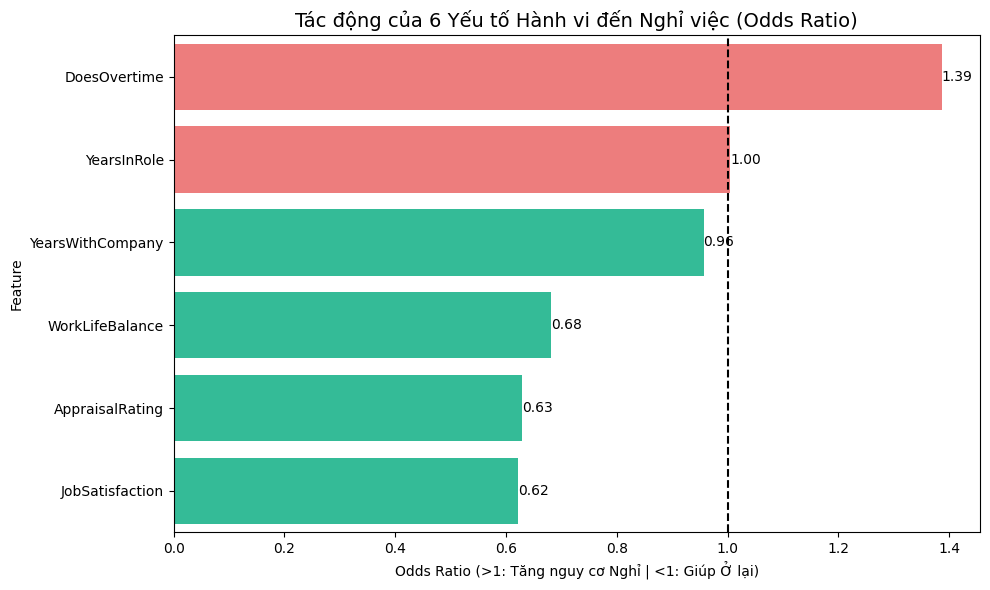

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# --- BƯỚC 1: ĐỊNH NGHĨA LIST FEATURE ---
# Lưu ý: Kiểm tra tên cột 'DoesOvertime_Yes' trong dữ liệu của bạn
target_features = [
    'JobSatisfaction',
    'AppraisalRating',
    'WorkLifeBalance',
    'YearsInRole',
    'YearsWithCompany',
    'DoesOvertime' # Nếu lỗi, hãy thử đổi thành 'DoesOvertime' hoặc 'DoesOvertime_1'
]

print("Đang phân tích các yếu tố:", target_features)

# --- BƯỚC 2: CẮT DỮ LIỆU ---
# Lọc các cột này từ tập Train (đã Oversample) và Test (Gốc)
# Dùng hàm .intersection để tránh lỗi nếu tên cột bị sai lệch chút xíu
cols_to_use = X_train_resampled.columns.intersection(target_features)

if len(cols_to_use) < 6:
    print(f"⚠️ CẢNH BÁO: Chỉ tìm thấy {len(cols_to_use)} cột. Hãy kiểm tra lại tên cột 'DoesOvertime'.")
    print("Các cột tìm thấy:", cols_to_use)

X_train_sub = X_train_resampled[cols_to_use]
X_test_sub = X_test_raw[cols_to_use]

# --- BƯỚC 3: SCALE DỮ LIỆU (BẮT BUỘC) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sub)
X_test_scaled = scaler.transform(X_test_sub)

# --- BƯỚC 4: CHẠY LOGISTIC REGRESSION ---
log_model_sub = LogisticRegression(class_weight='balanced', random_state=42)
log_model_sub.fit(X_train_scaled, y_train_resampled)

# --- BƯỚC 5: ĐÁNH GIÁ VÀ VẼ BIỂU ĐỒ ---
# Dự báo
y_pred = log_model_sub.predict(X_test_scaled)

# In kết quả
print("\n--- HIỆU QUẢ CỦA BỘ 6 FEATURES NÀY ---")
print(classification_report(y_test_raw, y_pred))

# Tính Odds Ratio
coefficients = log_model_sub.coef_[0]
odds_ratios = np.exp(coefficients)

df_odds = pd.DataFrame({
    'Feature': cols_to_use,
    'Odds_Ratio': odds_ratios
}).sort_values(by='Odds_Ratio', ascending=False)

# Vẽ biểu đồ Odds Ratio
plt.figure(figsize=(10, 6))
colors = ['#ff6b6b' if x > 1 else '#1dd1a1' for x in df_odds['Odds_Ratio']]
sns.barplot(x='Odds_Ratio', y='Feature', data=df_odds, palette=colors)
plt.axvline(x=1, color='black', linestyle='--')
plt.title('Tác động của 6 Yếu tố Hành vi đến Nghỉ việc (Odds Ratio)', fontsize=14)
plt.xlabel('Odds Ratio (>1: Tăng nguy cơ Nghỉ | <1: Giúp Ở lại)')

for index, value in enumerate(df_odds['Odds_Ratio']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.tight_layout()
plt.show()

/tmp/ipython-input-1604155337.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LeftCompany_Numeric', data=data, ax=axes[1], palette=colors)
/tmp/ipython-input-1604155337.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Ở lại (0)', 'Nghỉ việc (1)'])


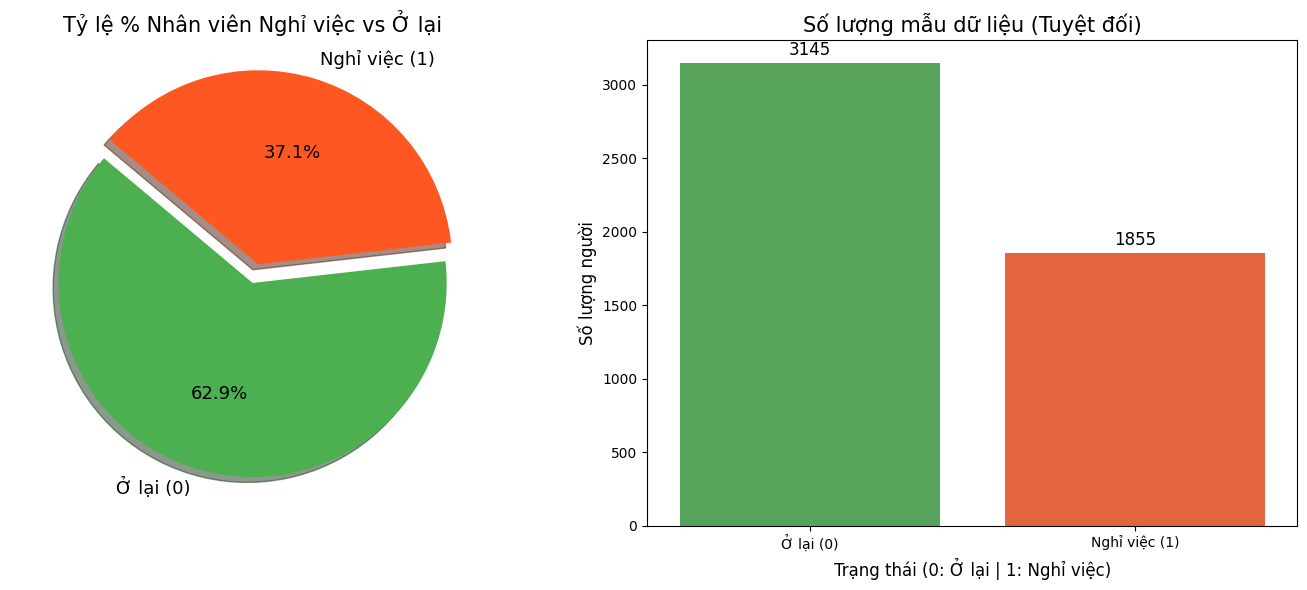

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập kích thước khung hình (1 hàng, 2 cột)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- BIỂU ĐỒ 1: PIE CHART (Tỷ lệ %) ---
# Đếm số lượng
counts = data['LeftCompany_Numeric'].value_counts()
# Định nghĩa nhãn và màu sắc
labels = ['Ở lại (0)', 'Nghỉ việc (1)']
colors = ['#4CAF50', '#FF5722'] # Xanh lá (An toàn) và Cam đỏ (Cảnh báo)
explode = (0, 0.1)  # Tách miếng "Nghỉ việc" ra một chút để nhấn mạnh

axes[0].pie(counts, labels=labels, autopct='%1.1f%%', startangle=140,
            colors=colors, explode=explode, shadow=True, textprops={'fontsize': 13})
axes[0].set_title('Tỷ lệ % Nhân viên Nghỉ việc vs Ở lại', fontsize=15)

# --- BIỂU ĐỒ 2: COUNT PLOT (Số lượng thực tế) ---
sns.countplot(x='LeftCompany_Numeric', data=data, ax=axes[1], palette=colors)
axes[1].set_title('Số lượng mẫu dữ liệu (Tuyệt đối)', fontsize=15)
axes[1].set_xlabel('Trạng thái (0: Ở lại | 1: Nghỉ việc)', fontsize=12)
axes[1].set_ylabel('Số lượng người', fontsize=12)
axes[1].set_xticklabels(['Ở lại (0)', 'Nghỉ việc (1)'])

# Thêm con số cụ thể lên đầu cột
for container in axes[1].containers:
    axes[1].bar_label(container, fontsize=12, padding=3)

plt.tight_layout()
plt.show()

**Resampling**

*   Oversampling là kỹ thuật xử lý mất cân bằng dữ liệu (imbalanced data) khi một lớp có số lượng mẫu quá ít so với lớp còn lại (ví dụ: 95% Not Attrition, 5% Attrition).

*   Khi dữ liệu mất cân bằng, mô hình sẽ học lệch về lớp lớn → dự đoán tệ cho lớp nhỏ.


**KHAI BÁO VÀ THƯ VIỆN**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HR_Attrition_Indian_Dataset.csv to HR_Attrition_Indian_Dataset (1).csv


In [ ]:
data = pd.read_csv('HR_Attrition_Indian_Dataset.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

**PREPROCESSING DATA**

In [ ]:
data = pd.read_csv('HR_Attrition_Indian_Dataset.csv')
# 2. Chuyển đổi biến mục tiêu 'LeftCompany' sang dạng số (1/0) để tính tương quan
# 'Yes' -> 1, 'No' -> 0
data['LeftCompany_Numeric'] = data['LeftCompany'].map({'Yes': 1, 'No': 0})
#Drop LeftCompany, EmployeeID
data = data.drop('LeftCompany', axis=1)
data = data.drop('EmployeeID', axis=1)
data = data.drop('FullName', axis=1)
data = data.drop('City', axis=1)
data = data.drop('DateOfJoining', axis=1)

#Binary Encoding: DoesOvertime
data['DoesOvertime'] = data['DoesOvertime'].map({'Yes': 1, 'No': 0})

#OneHot Encoding
data = data.join(pd.get_dummies(data['Department'], prefix='Department')).drop('Department', axis=1)
data = data.join(pd.get_dummies(data['Gender'])).drop('Gender', axis=1)
data = data.join(pd.get_dummies(data['Designation'], prefix='Designation')).drop('Designation', axis=1)
data = data.join(pd.get_dummies(data['EducationQualification'], prefix='EducationQualification')).drop('EducationQualification', axis=1)
data = data.join(pd.get_dummies(data['MaritalStatus'], prefix='MaritalStatus')).drop('MaritalStatus', axis=1)
data = data.map(lambda x: 1 if x is True else 0 if x is False else x)

**CHIA TRAIN/TEST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X,y = data.drop('LeftCompany_Numeric', axis=1), data['LeftCompany_Numeric']


In [ ]:
#Split data
from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#Oversample data
rus = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_raw, y_train_raw)

In [ ]:
# --- BƯỚC 3: HUẤN LUYỆN MÔ HÌNH ---
# Vì dùng Logistic Regression, BẮT BUỘC phải Scale dữ liệu (đưa về cùng đơn vị)
scaler = StandardScaler()

# Scale tập Train đã resample
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Scale tập Test gốc (Dùng scaler đã học từ tập train)
X_test_scaled = scaler.transform(X_test_raw)

model = LogisticRegression(max_iter=1000)
# Dạy mô hình bằng dữ liệu đã cân bằng
model.fit(X_train_scaled, y_train_resampled)

LogisticRegression(max_iter=1000)

In [ ]:
# --- BƯỚC 4: ĐÁNH GIÁ (QUAN TRỌNG NHẤT) ---
# Dự báo trên tập Test GỐC (chỉ scale, không oversample)
y_pred = model.predict(X_test_scaled)

print("\n--- KẾT QUẢ ĐÁNH GIÁ TRUNG THỰC ---")
print(classification_report(y_test_raw, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_raw, y_pred))


--- KẾT QUẢ ĐÁNH GIÁ TRUNG THỰC ---
              precision    recall  f1-score   support

           0       0.76      0.64      0.70       629
           1       0.52      0.66      0.58       371

    accuracy                           0.65      1000
   macro avg       0.64      0.65      0.64      1000
weighted avg       0.67      0.65      0.65      1000

Confusion Matrix:
 [[403 226]
 [127 244]]


/tmp/ipython-input-2659951648.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Odds_Ratio', y='Feature', data=df_odds, palette=colors)


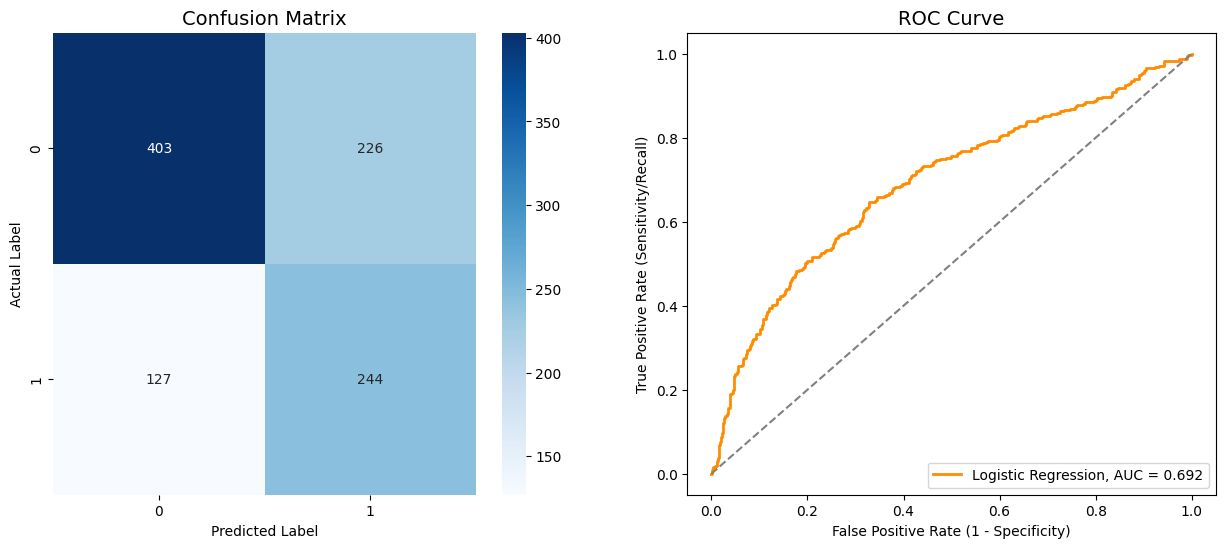

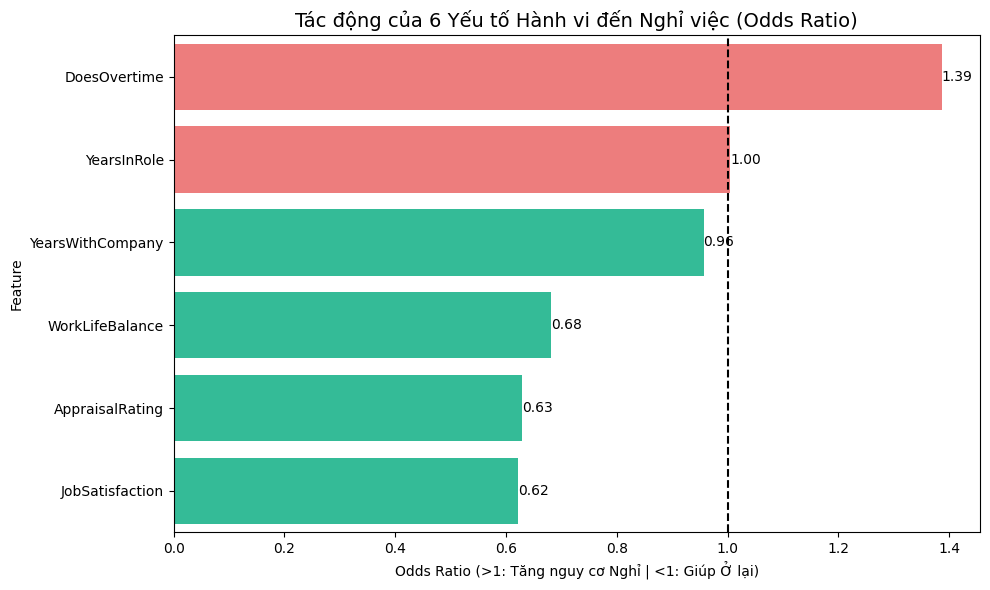

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
# --- BƯỚC 1: CHUẨN BỊ DỮ LIỆU VẼ ---
# Dự báo nhãn (0/1) để tính Confusion Matrix
y_pred = model.predict(X_test_scaled) # Nhớ dùng X_test_scaled

# Dự báo xác suất (0.0 -> 1.0) để vẽ ROC
# [:, 1] nghĩa là lấy xác suất của lớp 1 (Lớp Nghỉ việc)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Tính toán ma trận nhầm lẫn
cnf_matrix = confusion_matrix(y_test_raw, y_pred)

# Tính điểm AUC
auc_score = roc_auc_score(y_test_raw, y_pred_proba)

# --- BƯỚC 2: VẼ BIỂU ĐỒ ---
fig = plt.figure(figsize=(15, 6))

# -- Biểu đồ 1: Confusion Matrix Heatmap --
ax1 = fig.add_subplot(1, 2, 1)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues", fmt='d', ax=ax1)
ax1.set_title('Confusion Matrix', fontsize=14)
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('Actual Label')

# -- Biểu đồ 2: ROC Curve --
ax2 = fig.add_subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test_raw, y_pred_proba)

# Vẽ đường ROC
ax2.plot(fpr, tpr, label="Logistic Regression, AUC = {:.3f}".format(auc_score), color='darkorange', lw=2)
# Vẽ đường chéo 50% (ngẫu nhiên) để so sánh
ax2.plot([0, 1], [0, 1], linestyle='--', color='gray')

ax2.set_title('ROC Curve', fontsize=14)
ax2.set_xlabel('False Positive Rate (1 - Specificity)')
ax2.set_ylabel('True Positive Rate (Sensitivity/Recall)')
ax2.legend(loc=4)
# Vẽ biểu đồ Odds Ratio
plt.figure(figsize=(10, 6))
colors = ['#ff6b6b' if x > 1 else '#1dd1a1' for x in df_odds['Odds_Ratio']]
sns.barplot(x='Odds_Ratio', y='Feature', data=df_odds, palette=colors)
plt.axvline(x=1, color='black', linestyle='--')
plt.title('Tác động của 6 Yếu tố Hành vi đến Nghỉ việc (Odds Ratio)', fontsize=14)
plt.xlabel('Odds Ratio (>1: Tăng nguy cơ Nghỉ | <1: Giúp Ở lại)')

for index, value in enumerate(df_odds['Odds_Ratio']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.tight_layout()
plt.show()


###**Support Vector Machine (SVM)**

**KHAI BÁO VÀ THƯ VIỆN**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HR_Attrition_Indian_Dataset.csv to HR_Attrition_Indian_Dataset.csv


In [ ]:
data = pd.read_csv('HR_Attrition_Indian_Dataset.csv')
data.head()

,EmployeeID,FullName,Age,Gender,Department,Designation,EducationQualification,MonthlySalary,DateOfJoining,YearsWithCompany,...,TrainingHours,DoesOvertime,JobSatisfaction,WorkLifeBalance,MaritalStatus,PreviousCompanies,DistanceFromHome,LeavesTaken,City,LeftCompany
0,EMP20230001,Sahil Tailor,48,Other,HR,Accounts Officer,B.Tech,111813,2020-05-26,5,...,37,Yes,4,3,Single,0,12.2,4,Mumbai,No
1,EMP20230002,Parinaaz Choudhary,26,Female,IT,Accounts Officer,B.Tech,87425,2020-10-02,5,...,39,No,2,2,Divorced,0,36.7,29,Kolkata,No
2,EMP20230003,Anahi Babu,40,Male,IT,Software Engineer,Diploma,86461,2021-05-01,4,...,32,No,2,3,Married,1,45.4,0,Bengaluru,Yes
3,EMP20230004,Dhruv Dass,54,Other,HR,Accounts Officer,Diploma,23720,2023-04-01,2,...,21,Yes,4,4,Married,0,29.9,27,Kolkata,No
4,EMP20230005,Seher Bal,51,Other,Admin,Sales Associate,B.Tech,39041,2018-12-19,7,...,30,No,2,2,Single,0,26.8,6,Delhi,Yes


**PREPROCESSING DATA**

In [ ]:
data = pd.read_csv('HR_Attrition_Indian_Dataset.csv')
# 2. Chuyển đổi biến mục tiêu 'LeftCompany' sang dạng số (1/0) để tính tương quan
# 'Yes' -> 1, 'No' -> 0
data['LeftCompany_Numeric'] = data['LeftCompany'].map({'Yes': 1, 'No': 0})
#Drop LeftCompany, EmployeeID
data = data.drop('LeftCompany', axis=1)
data = data.drop('EmployeeID', axis=1)
data = data.drop('FullName', axis=1)
data = data.drop('City', axis=1)
data = data.drop('DateOfJoining', axis=1)

#Binary Encoding: DoesOvertime
data['DoesOvertime'] = data['DoesOvertime'].map({'Yes': 1, 'No': 0})

#OneHot Encoding
data = data.join(pd.get_dummies(data['Department'], prefix='Department')).drop('Department', axis=1)
data = data.join(pd.get_dummies(data['Gender'])).drop('Gender', axis=1)
data = data.join(pd.get_dummies(data['Designation'], prefix='Designation')).drop('Designation', axis=1)
data = data.join(pd.get_dummies(data['EducationQualification'], prefix='EducationQualification')).drop('EducationQualification', axis=1)
data = data.join(pd.get_dummies(data['MaritalStatus'], prefix='MaritalStatus')).drop('MaritalStatus', axis=1)
data = data.map(lambda x: 1 if x is True else 0 if x is False else x)

**CHIA TRAIN/TEST**

In [ ]:
from sklearn.model_selection import train_test_split

X,y = data.drop('LeftCompany_Numeric', axis=1), data['LeftCompany_Numeric']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=10)

In [ ]:
#Scale dữ liệu
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**MODELLING**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

**Grid Search**

In [ ]:
param_grid = {
    # C càng lớn càng khắt khe, cố gắng bắt đúng từng điểm
    'C': [0.5, 0.8, 1,5],
    # gamma càng lớn thì vùng ảnh hưởng càng hẹp (vẽ đường cong phức tạp hơn)
    'gamma': ['scaled', 0.1, 0.01, 0.001],
    # Kernel giữ nguyên rbf
    'kernel': ['rbf'],

    # Luôn giữ balanced
    'class_weight': ['balanced']
}

In [ ]:
param_grid = {
    # C càng lớn càng khắt khe, cố gắng bắt đúng từng điểm
    'C': [0.5, 0.8, 1,5],
    # gamma càng lớn thì vùng ảnh hưởng càng hẹp (vẽ đường cong phức tạp hơn)
    'gamma': ['scaled', 0.1, 0.01, 0.001],
    # Kernel giữ nguyên rbf
    'kernel': ['rbf'],

    # Luôn giữ balanced
    'class_weight': ['balanced']
}
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# 2. Thiết lập GridSearch
# scoring='f1': Chúng ta muốn cân bằng cả Precision và Recall
# Nếu bạn muốn ưu tiên bắt người nghỉ bằng mọi giá, hãy đổi thành scoring='recall'
grid_svm = GridSearchCV(SVC(probability=True, random_state=42),
                        param_grid,
                        refit=True,
                        verbose=2,
                        cv=3,
                        scoring='accuracy') # Hoặc 'recall'
grid_svm.fit(X_train_scaled, y_train) # Nhớ dùng dữ liệu đã Scale

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END C=0.5, class_weight=balanced, gamma=scaled, kernel=rbf; total time=   0.0s
[CV] END C=0.5, class_weight=balanced, gamma=scaled, kernel=rbf; total time=   0.0s
[CV] END C=0.5, class_weight=balanced, gamma=scaled, kernel=rbf; total time=   0.0s
[CV] END C=0.5, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END C=0.5, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.4s
[CV] END C=0.5, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END C=0.5, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.1s
[CV] END C=0.5, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.0s
[CV] END C=0.5, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.1s
[CV] END C=0.5, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   2.9s
[CV] END C=0.5, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   2.7s
[CV] END C=0.5, class_weight=bal

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
12 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_

GridSearchCV(cv=3, estimator=SVC(probability=True, random_state=42),
             param_grid={'C': [0.5, 0.8, 1, 5], 'class_weight': ['balanced'],
                         'gamma': ['scaled', 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [ ]:
svm_model = SVC(
    kernel='rbf',
    C=10,
    gamma='scale',
    probability=True
)

svm_model.fit(X_train_scaled, y_train)

SVC(C=10, probability=True)


--- KẾT QUẢ MÔ HÌNH SVM ---
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       627
           1       0.58      0.48      0.52       373

    accuracy                           0.67      1000
   macro avg       0.65      0.63      0.64      1000
weighted avg       0.67      0.67      0.67      1000



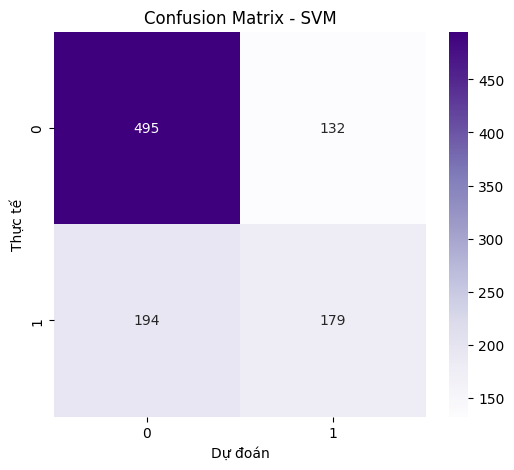

In [ ]:
# --- BƯỚC 5: ĐÁNH GIÁ KẾT QUẢ ---
y_pred = svm_model.predict(X_test_scaled)

print("\n--- KẾT QUẢ MÔ HÌNH SVM ---")
print(classification_report(y_test, y_pred))

# Vẽ Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Predict
y_pred = svm_model.predict(X_test_scaled)

# Lấy report dạng dict
report = classification_report(
    y_test,
    y_pred,
    output_dict=True
)

# Chuyển sang DataFrame
df_report = pd.DataFrame(report).T

# Nhân 100 để ra %
df_report = df_report * 100

# In với 4 chữ số sau dấu phẩy
print(df_report.round(4))


NameError: name 'svm_model' is not defined

Cách khác:

In [ ]:
param_grid_rbf = {
    'kernel': ['rbf'],
    'C': [1, 5, 10, 30, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'class_weight': [None, {0:1, 1:2}, {0:1, 1:3}]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# 2. Thiết lập GridSearch
# scoring='f1': Chúng ta muốn cân bằng cả Precision và Recall
# Nếu bạn muốn ưu tiên bắt người nghỉ bằng mọi giá, hãy đổi thành scoring='recall'
grid_svm = GridSearchCV(SVC(probability=True, random_state=42),
                        param_grid,
                        refit=True,
                        verbose=2,
                        cv=3,
                        scoring='accuracy') # Hoặc 'recall'
grid_svm.fit(X_train_scaled, y_train) # Nhớ dùng dữ liệu đã Scale

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] END ....C=1, class_weight=None, gamma=scale, kernel=rbf; total time=   2.1s
[CV] END ....C=1, class_weight=None, gamma=scale, kernel=rbf; total time=   1.9s
[CV] END ....C=1, class_weight=None, gamma=scale, kernel=rbf; total time=   1.9s
[CV] END .....C=1, class_weight=None, gamma=auto, kernel=rbf; total time=   2.0s
[CV] END .....C=1, class_weight=None, gamma=auto, kernel=rbf; total time=   2.9s
[CV] END .....C=1, class_weight=None, gamma=auto, kernel=rbf; total time=   2.0s
[CV] END ......C=1, class_weight=None, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END ......C=1, class_weight=None, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END ......C=1, class_weight=None, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END .....C=1, class_weight=None, gamma=0.01, kernel=rbf; total time=   2.7s
[CV] END .....C=1, class_weight=None, gamma=0.01, kernel=rbf; total time=   1.7s
[CV] END .....C=1, class_weight=None, gamma=0.0

GridSearchCV(cv=3, estimator=SVC(probability=True, random_state=42),
             param_grid={'C': [1, 2, 5, 10, 20],
                         'class_weight': [None, {0: 1, 1: 2}, {0: 1, 1: 3}],
                         'gamma': ['scale', 'auto', 0.1, 0.01],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [ ]:
print("Best Params", grid_svm.best_params_)
print("Best Score: ", grid_svm.best_score_)

Best Params {'C': 5, 'class_weight': None, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score:  0.7247505279618256


              precision    recall  f1-score   support

           0       0.75      0.88      0.81       627
           1       0.71      0.50      0.58       373

    accuracy                           0.74      1000
   macro avg       0.73      0.69      0.70      1000
weighted avg       0.73      0.74      0.72      1000



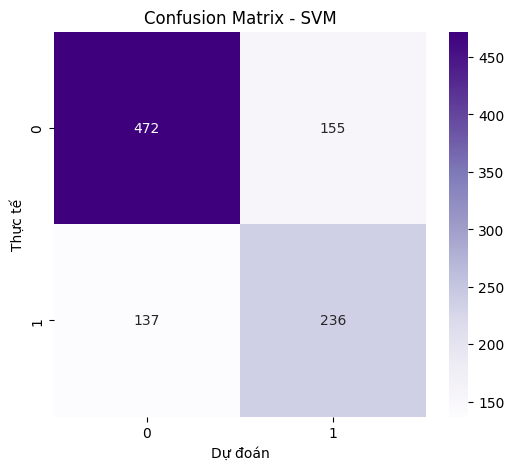

In [ ]:
# 4. Đánh giá trên tập Test
y_pred_best = grid_svm.predict(X_test_scaled)
print(classification_report(y_test, y_pred_best))
# Vẽ Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

###**Convolutional Neural Networks**

**KHAI BÁO VÀ THƯ VIỆN**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HR_Attrition_Indian_Dataset.csv to HR_Attrition_Indian_Dataset (2).csv


In [ ]:
data = pd.read_csv('HR_Attrition_Indian_Dataset.csv')
data.head()

,EmployeeID,FullName,Age,Gender,Department,Designation,EducationQualification,MonthlySalary,DateOfJoining,YearsWithCompany,...,TrainingHours,DoesOvertime,JobSatisfaction,WorkLifeBalance,MaritalStatus,PreviousCompanies,DistanceFromHome,LeavesTaken,City,LeftCompany
0,EMP20230001,Sahil Tailor,48,Other,HR,Accounts Officer,B.Tech,111813,2020-05-26,5,...,37,Yes,4,3,Single,0,12.2,4,Mumbai,No
1,EMP20230002,Parinaaz Choudhary,26,Female,IT,Accounts Officer,B.Tech,87425,2020-10-02,5,...,39,No,2,2,Divorced,0,36.7,29,Kolkata,No
2,EMP20230003,Anahi Babu,40,Male,IT,Software Engineer,Diploma,86461,2021-05-01,4,...,32,No,2,3,Married,1,45.4,0,Bengaluru,Yes
3,EMP20230004,Dhruv Dass,54,Other,HR,Accounts Officer,Diploma,23720,2023-04-01,2,...,21,Yes,4,4,Married,0,29.9,27,Kolkata,No
4,EMP20230005,Seher Bal,51,Other,Admin,Sales Associate,B.Tech,39041,2018-12-19,7,...,30,No,2,2,Single,0,26.8,6,Delhi,Yes


**PREPROCESSING DATA**

In [ ]:
data = pd.read_csv('HR_Attrition_Indian_Dataset.csv')
# 2. Chuyển đổi biến mục tiêu 'LeftCompany' sang dạng số (1/0) để tính tương quan
# 'Yes' -> 1, 'No' -> 0
data['LeftCompany_Numeric'] = data['LeftCompany'].map({'Yes': 1, 'No': 0})
#Drop LeftCompany, EmployeeID
data = data.drop('LeftCompany', axis=1)
data = data.drop('EmployeeID', axis=1)
data = data.drop('FullName', axis=1)
data = data.drop('City', axis=1)
data = data.drop('DateOfJoining', axis=1)

#Binary Encoding: DoesOvertime
data['DoesOvertime'] = data['DoesOvertime'].map({'Yes': 1, 'No': 0})

#OneHot Encoding
data = data.join(pd.get_dummies(data['Department'], prefix='Department')).drop('Department', axis=1)
data = data.join(pd.get_dummies(data['Gender'])).drop('Gender', axis=1)
data = data.join(pd.get_dummies(data['Designation'], prefix='Designation')).drop('Designation', axis=1)
data = data.join(pd.get_dummies(data['EducationQualification'], prefix='EducationQualification')).drop('EducationQualification', axis=1)
data = data.join(pd.get_dummies(data['MaritalStatus'], prefix='MaritalStatus')).drop('MaritalStatus', axis=1)
data = data.map(lambda x: 1 if x is True else 0 if x is False else x)

**CHIA TRAIN/TEST**

In [ ]:
from sklearn.model_selection import train_test_split

X,y = data.drop('LeftCompany_Numeric', axis=1), data['LeftCompany_Numeric']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=10)

In [ ]:
#Scale dữ liệu
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# --- BƯỚC 1: CHUẨN BỊ DỮ LIỆU ---
# Khuyên dùng: Dữ liệu Train đã Oversample (để cân bằng) và Test gốc
# Giả sử bạn đang dùng biến X_train_resampled và y_train_resampled từ các bước trước
X_train_cnn = X_train.copy()
y_train_cnn = y_train.copy()

X_test_cnn = X_test.copy()     # Dùng tập test gốc
y_test_cnn = y_test.copy()

# --- BƯỚC 2: SCALE DỮ LIỆU (BẮT BUỘC) ---
# Mạng nơ-ron không thể học tốt nếu số liệu chênh lệch quá lớn
scaler = StandardScaler()
X_train_cnn = scaler.fit_transform(X_train_cnn)
X_test_cnn = scaler.transform(X_test_cnn)

In [ ]:
from imblearn.over_sampling import SMOTE
# --- SMOTE trên TRAIN ---
sm = SMOTE(k_neighbors=5, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_cnn, y_train_cnn)

print("Trước SMOTE:", len(y_train_cnn))
print("Sau SMOTE:", len(y_train_res))
print("Số lượng mỗi lớp:", dict(sorted(zip(*np.unique(y_train_res, return_counts=True)))))

Trước SMOTE: 4000
Sau SMOTE: 5036
Số lượng mỗi lớp: {np.int64(0): np.int64(2518), np.int64(1): np.int64(2518)}


**Reshape lại để đưa vào CNN**

In [ ]:
# --- BƯỚC 3: RESHAPE (BIẾN HÌNH TỪ 2D -> 3D) ---
# CNN yêu cầu đầu vào dạng: (Số mẫu, Số cột, 1 kênh)
# Hiện tại: (Số mẫu, Số cột) -> Cần thêm 1 chiều nữa vào cuối
n_features = X_train_cnn.shape[1]

X_train_res = X_train_res.reshape(X_train_res.shape[0], n_features, 1)
X_test_cnn = X_test_cnn.reshape(X_test_cnn.shape[0], n_features, 1)

print(f"Kích thước đầu vào sau khi Reshape: {X_train_cnn.shape}")
# Kỳ vọng: (..., 15, 1)



Kích thước đầu vào sau khi Reshape: (4000, 33)


**Thiết kế kiến trúc mạng CNN**

In [ ]:
# --- BƯỚC 4: THIẾT KẾ KIẾN TRÚC MẠNG CNN ---
model = Sequential()

# 1. Lớp Tích chập (Convolution): Quét tìm mẫu hình
# filters=32: Dùng 32 cái "kính lúp" khác nhau để soi
# kernel_size=3: Mỗi lần soi 3 cột đứng cạnh nhau
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_features, 1)))
model.add(BatchNormalization()) # Giúp ổn định quá trình học

# 2. Lớp Gộp (Pooling): Giữ lại thông tin quan trọng nhất
model.add(MaxPooling1D(pool_size=2))

# 3. Lớp Dropout: Tắt bớt nơ-ron để chống học vẹt (Overfitting)
model.add(Dropout(0.2))

# 4. Duỗi thẳng (Flatten): Để nối vào lớp nơ-ron thường
model.add(Flatten())

# 5. Lớp nơ-ron ẩn (Dense Layer)
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(0.1)) # Dropout thêm lần nữa cho chắc

# 6. Lớp đầu ra (Output): 1 nơ-ron duy nhất trả về xác suất
model.add(Dense(1, activation='sigmoid'))
class_weight = {0: 1, 1: 1.5}

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Huấn luyện mô hình**

In [ ]:
# --- BƯỚC 5: BIÊN DỊCH & HUẤN LUYỆN ---
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("\n--- BẮT ĐẦU HUẤN LUYỆN ---")
# epochs=30: Học 30 vòng
history = model.fit(X_train_res, y_train_res,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test_cnn, y_test_cnn),
                    verbose=1)



--- BẮT ĐẦU HUẤN LUYỆN ---
Epoch 1/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5946 - loss: 0.8581 - val_accuracy: 0.6590 - val_loss: 0.7529
Epoch 2/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6891 - loss: 0.6985 - val_accuracy: 0.6500 - val_loss: 0.7351
Epoch 3/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7071 - loss: 0.6588 - val_accuracy: 0.6920 - val_loss: 0.6931
Epoch 4/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7235 - loss: 0.6324 - val_accuracy: 0.6640 - val_loss: 0.6994
Epoch 5/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7315 - loss: 0.6176 - val_accuracy: 0.7000 - val_loss: 0.6863
Epoch 6/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7311 - loss: 0.6192 - val_accuracy: 0.6710 - val_loss: 0.7231
Epoch 7/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7484 - loss: 0.5822 - val_accuracy: 0.6820 - val_loss: 0.6933
Epoch 8/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7810 - los

**Đánh giá mô hình**

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

--- KẾT QUẢ MÔ HÌNH CNN (%) ---
              precision   recall  f1-score   support
0               75.2809  74.8006   75.0400   62700.0
1               58.0902  58.7131   58.4000   37300.0
accuracy        68.8000  68.8000   68.8000      68.8
macro avg       66.6855  66.7569   66.7200  100000.0
weighted avg    68.8688  68.8000   68.8333  100000.0


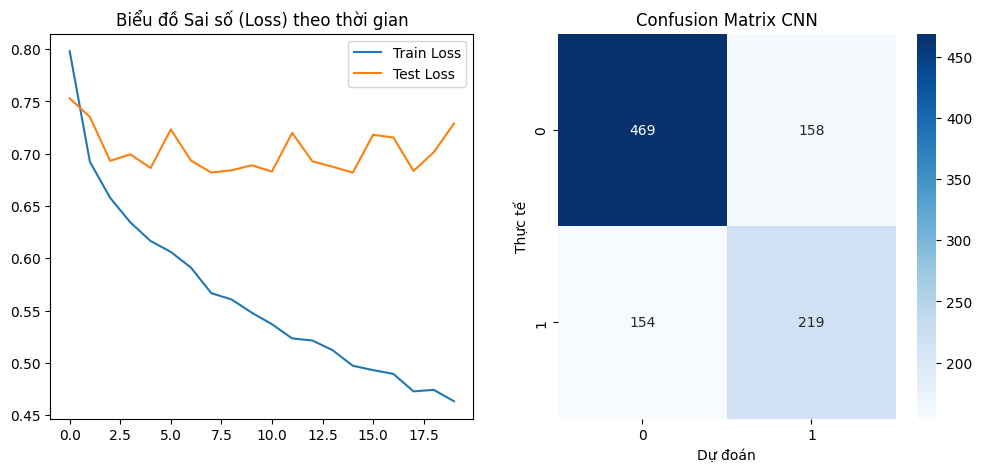

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# --- DỰ ĐOÁN ---
y_pred_prob = model.predict(X_test_cnn).ravel()   # xác suất
y_pred_cnn = (y_pred_prob > 0.5).astype(int)      # threshold 0.5

# --- CLASSIFICATION REPORT (% - 4 chữ số) ---
report = classification_report(
    y_test_cnn,
    y_pred_cnn,
    output_dict=True
)

df_report = pd.DataFrame(report).T
df_report = (df_report * 100).round(4)

print("\n--- KẾT QUẢ MÔ HÌNH CNN (%) ---")
print(df_report)

# --- VẼ BIỂU ĐỒ ---
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Biểu đồ Sai số (Loss) theo thời gian')
plt.legend()

# Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(
    confusion_matrix(y_test_cnn, y_pred_cnn),
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title('Confusion Matrix CNN')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')

plt.show()


###**K-Nearest Neighbors**

**THƯ VIỆN**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HR_Attrition_Indian_Dataset.csv to HR_Attrition_Indian_Dataset (1).csv


In [ ]:
data = pd.read_csv('HR_Attrition_Indian_Dataset.csv')
data.head()

,EmployeeID,FullName,Age,Gender,Department,Designation,EducationQualification,MonthlySalary,DateOfJoining,YearsWithCompany,...,TrainingHours,DoesOvertime,JobSatisfaction,WorkLifeBalance,MaritalStatus,PreviousCompanies,DistanceFromHome,LeavesTaken,City,LeftCompany
0,EMP20230001,Sahil Tailor,48,Other,HR,Accounts Officer,B.Tech,111813,2020-05-26,5,...,37,Yes,4,3,Single,0,12.2,4,Mumbai,No
1,EMP20230002,Parinaaz Choudhary,26,Female,IT,Accounts Officer,B.Tech,87425,2020-10-02,5,...,39,No,2,2,Divorced,0,36.7,29,Kolkata,No
2,EMP20230003,Anahi Babu,40,Male,IT,Software Engineer,Diploma,86461,2021-05-01,4,...,32,No,2,3,Married,1,45.4,0,Bengaluru,Yes
3,EMP20230004,Dhruv Dass,54,Other,HR,Accounts Officer,Diploma,23720,2023-04-01,2,...,21,Yes,4,4,Married,0,29.9,27,Kolkata,No
4,EMP20230005,Seher Bal,51,Other,Admin,Sales Associate,B.Tech,39041,2018-12-19,7,...,30,No,2,2,Single,0,26.8,6,Delhi,Yes


**PREPROCESSING DATA**

In [ ]:
# 2. Chuyển đổi biến mục tiêu 'LeftCompany' sang dạng số (1/0) để tính tương quan
# 'Yes' -> 1, 'No' -> 0
data['LeftCompany_Numeric'] = data['LeftCompany'].map({'Yes': 1, 'No': 0})
#Drop LeftCompany, EmployeeID
data = data.drop('LeftCompany', axis=1)
data = data.drop('EmployeeID', axis=1)
data = data.drop('FullName', axis=1)
data = data.drop('City', axis=1)
data = data.drop('DateOfJoining', axis=1)

#Binary Encoding: DoesOvertime
data['DoesOvertime'] = data['DoesOvertime'].map({'Yes': 1, 'No': 0})

#OneHot Encoding
data = data.join(pd.get_dummies(data['Department'], prefix='Department')).drop('Department', axis=1)
data = data.join(pd.get_dummies(data['Gender'])).drop('Gender', axis=1)
data = data.join(pd.get_dummies(data['Designation'], prefix='Designation')).drop('Designation', axis=1)
data = data.join(pd.get_dummies(data['EducationQualification'], prefix='EducationQualification')).drop('EducationQualification', axis=1)
data = data.join(pd.get_dummies(data['MaritalStatus'], prefix='MaritalStatus')).drop('MaritalStatus', axis=1)
data = data.map(lambda x: 1 if x is True else 0 if x is False else x)

**CHIA TRAIN/TEST**

In [ ]:
from sklearn.model_selection import train_test_split

X,y = data.drop('LeftCompany_Numeric', axis=1), data['LeftCompany_Numeric']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=10)

**SCALE DATA**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Scale dữ liệu
#scaler = MinMaxScaler(feature_range=(0,1))
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from imblearn.over_sampling import SMOTE
# --- SMOTE trên TRAIN ---
sm = SMOTE(k_neighbors=5, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Trước SMOTE:", len(y_train))
print("Sau SMOTE:", len(y_train_res))
print("Số lượng mỗi lớp:", dict(sorted(zip(*np.unique(y_train_res, return_counts=True)))))

Trước SMOTE: 4000
Sau SMOTE: 5036
Số lượng mỗi lớp: {np.int64(0): np.int64(2518), np.int64(1): np.int64(2518)}


**TÌM K TỐI ƯU**

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': [1,3,5,7],
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan', 'euclidean'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    params,
    scoring="recall",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Params: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best Score: 0.4028005278005278


**MODELLING**

In [ ]:
# --- BƯỚC 4: HUẤN LUYỆN VỚI K ĐÃ CHỌN ---
knn_model = KNeighborsClassifier(n_neighbors=59, weights='distance', n_jobs=-1,metric='manhattan')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=59,
                     weights='distance')

In [ ]:
knn_model.score(X_test,y_test)

0.651

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- BƯỚC 5: ĐÁNH GIÁ ---
y_prob = knn_model.predict_proba(X_test)[:, 1]
y_pred = (y_prob > 0.35).astype(int)

print("\n--- KẾT QUẢ KNN (%) ---")

# Lấy report dạng dict
report = classification_report(
    y_test,
    y_pred,
    output_dict=True
)

# Chuyển sang DataFrame
df_report = pd.DataFrame(report).T

# Nhân 100 để ra %
df_report = df_report * 100

# Làm tròn 4 chữ số sau dấu phẩy
df_report = df_report.round(4)

print(df_report)


--- KẾT QUẢ KNN (%) ---
              precision   recall  f1-score   support
0               76.6316  58.0542   66.0617   62700.0
1               49.9048  70.2413   58.3519   37300.0
accuracy        62.6000  62.6000   62.6000      62.6
macro avg       63.2682  64.1478   62.2068  100000.0
weighted avg    66.6625  62.6000   63.1859  100000.0


**Thêm: Vẽ K với F1**

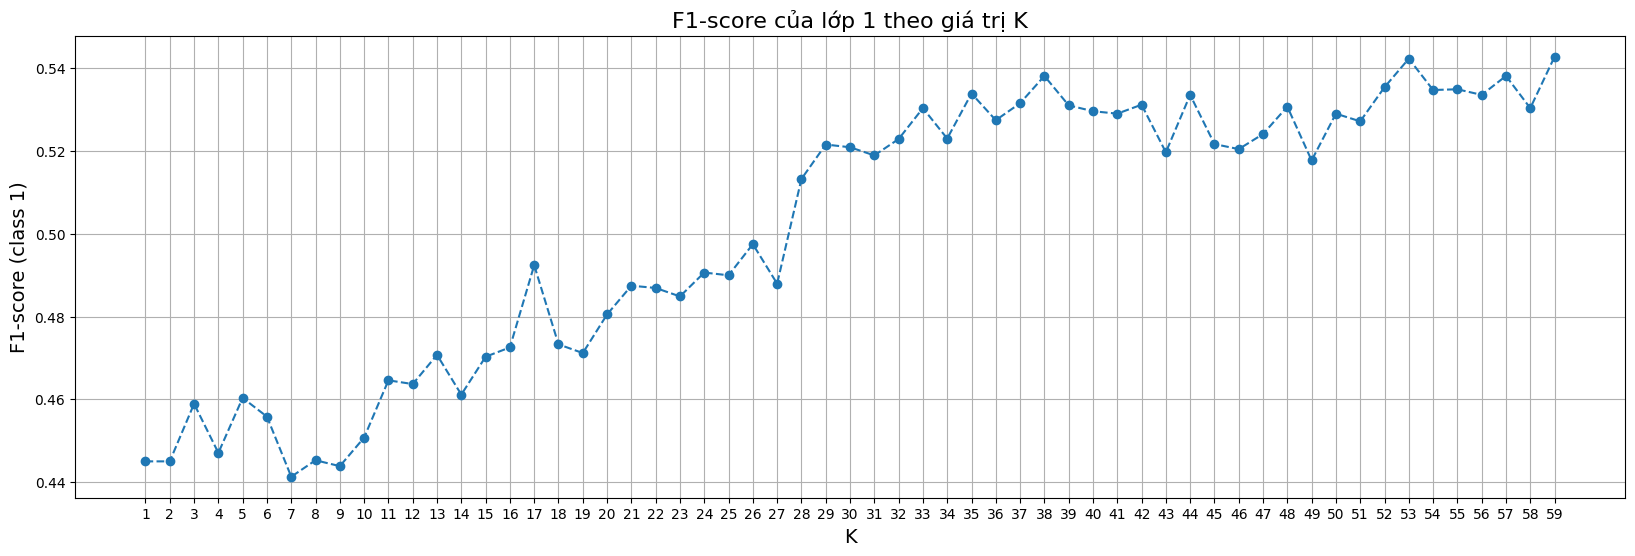

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

f1_scores = []

K_range = range(1, 60)

for k in K_range:
    knn = KNeighborsClassifier(
        n_neighbors=k,
        weights='distance',
        metric='manhattan'
    )
    knn.fit(X_train_res, y_train_res)
    pred = knn.predict(X_test)

    f1 = f1_score(y_test, pred, pos_label=1)
    f1_scores.append(f1)

# --- VẼ BIỂU ĐỒ ---
plt.figure(figsize=(20, 6))
plt.plot(K_range, f1_scores, marker='o', linestyle='--')
plt.title("F1-score của lớp 1 theo giá trị K", fontsize=16)
plt.xlabel("K", fontsize=14)
plt.ylabel("F1-score (class 1)", fontsize=14)
plt.xticks(K_range)
plt.grid(True)
plt.show()
